In [1]:
##################### Appendix ######################
import sys
sys.path.append('..')
from regression_utils import read_residual_data
import numpy as np
import matplotlib.pyplot as plt
import glob
root = glob.glob('../data/trajectories/*')
path = ['../data/test_trajectory/traj17_z.panda.dat']
from tqdm import tqdm
HORIZON = list(range(1,10)) + list(range(10,20,5)) + list(range(20,60,10))

In [2]:
HORIZON

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]

In [3]:
from regression import CV_RR
from sklearn.preprocessing import PolynomialFeatures

def feature1(x, FourierOrder=9):
    aug = x
    poly = PolynomialFeatures(1)
    aug = poly.fit_transform(aug)
    for k in range(1, FourierOrder):
        aug = np.concatenate([aug, np.sin(k*x)], axis=1)
        aug = np.concatenate([aug, np.cos(k*x)], axis=1)
    return aug

In [4]:
horizon = 5
x, xref, xH, xHref, error, errorH = read_residual_data(root, horizon) # errorH start from horizon

In [5]:
labd = np.logspace(-2,2,10)
RR = CV_RR(labd)

### test set

In [6]:
x_test, xref_test, xH_test, xHref_test, error_test, errorH_test = read_residual_data(path, horizon)

### plot the order of fourier order

In [7]:
ORDER = np.arange(20)
MAE_L = []
for order in ORDER:
    RR.fit(feature1(x-xref, order), error, 4, verbose=False)
    res_pred_RR = RR.predict(feature1(x_test-xref_test, order), RR.beta)
    MAE = np.abs((error_test - res_pred_RR)).sum() / len(error_test)
    MAE_L.append(MAE)
    print("Mean absolute error [Order {0}]: {1:.3f}".format(order, MAE))

 10%|█         | 1/10 [00:00<00:00,  9.22it/s]

Mean absolute error [Order 0]: 1.469


100%|██████████| 10/10 [00:01<00:00,  9.44it/s]


Mean absolute error [Order 1]: 1.469


100%|██████████| 10/10 [00:02<00:00,  4.57it/s]


Mean absolute error [Order 2]: 1.475


100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


Mean absolute error [Order 3]: 1.476


  0%|          | 0/10 [00:00<?, ?it/s]


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (20,) and (4,)

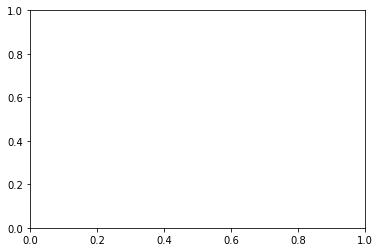

In [8]:
import matplotlib.pyplot as plt
plt.plot(ORDER, MAE_L)
plt.grid()
plt.show()

In [9]:
res_pred_RR = RR.predict(feature1(x_test-xref_test, best_order), RR.beta)

NameError: name 'best_order' is not defined

In [ ]:
MAE = ((error_test - res_pred_RR)**2).sum() / len(error_test)
print("Mean square error [RR]: {:.2f}".format(MAE))

- Conclusion: the linear residual model is already the best!

In [ ]:
best_order = 0

In [ ]:
RR.fit(feature1(x-xref, best_order), error, 4)

## explore the impact of tracking error horizon

In [10]:
labd = np.logspace(-2,2,6)
RR_H = CV_RR(labd)

In [11]:
MAE_L = []
for h in tqdm(HORIZON):
    x, xref, xH, xHref, error, errorH = read_residual_data(root, h)
    x_test, xref_test, xH_test, xHref_test, error_test, errorH_test = read_residual_data(path, h)
    RR_H.fit(xH-xHref, errorH, 4, verbose=False)
    res_pred_RR = RR_H.predict(xH_test-xHref_test, RR_H.beta)
    MAE = np.abs((errorH_test - res_pred_RR)).sum() / len(errorH_test)
    MAE_L.append(MAE)
    print("Mean absolute error [horizon {0}]: {1:.3f}".format(h, MAE))

  7%|▋         | 1/15 [00:12<02:52, 12.30s/it]

Mean absolute error [horizon 1]: 1.588



 13%|█▎        | 2/15 [00:25<02:46, 12.80s/it]

Mean absolute error [horizon 2]: 1.602



 20%|██        | 3/15 [00:38<02:37, 13.12s/it]

Mean absolute error [horizon 3]: 1.614



 27%|██▋       | 4/15 [00:53<02:28, 13.52s/it]

Mean absolute error [horizon 4]: 1.572



 33%|███▎      | 5/15 [01:07<02:19, 13.93s/it]

Mean absolute error [horizon 5]: 1.579



 40%|████      | 6/15 [01:23<02:10, 14.46s/it]

Mean absolute error [horizon 6]: 1.584



 47%|████▋     | 7/15 [01:39<02:00, 15.03s/it]

Mean absolute error [horizon 7]: 1.588



 53%|█████▎    | 8/15 [01:55<01:48, 15.52s/it]

Mean absolute error [horizon 8]: 1.590



 60%|██████    | 9/15 [02:13<01:35, 15.99s/it]

Mean absolute error [horizon 9]: 1.593



 67%|██████▋   | 10/15 [02:30<01:22, 16.53s/it]

Mean absolute error [horizon 10]: 1.594



 73%|███████▎  | 11/15 [02:50<01:10, 17.60s/it]

Mean absolute error [horizon 15]: 1.597



 80%|████████  | 12/15 [03:13<00:57, 19.21s/it]

Mean absolute error [horizon 20]: 1.599



 87%|████████▋ | 13/15 [03:45<00:46, 23.01s/it]

Mean absolute error [horizon 30]: 1.554



 93%|█████████▎| 14/15 [04:29<00:29, 29.38s/it]

Mean absolute error [horizon 40]: 1.558



100%|██████████| 15/15 [05:23<00:00, 21.57s/it]

Mean absolute error [horizon 50]: 1.562


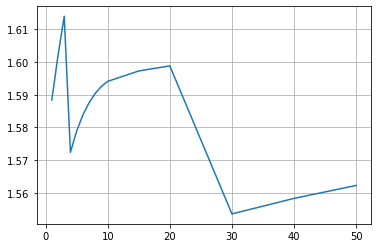

In [12]:
import matplotlib.pyplot as plt
plt.plot(HORIZON, MAE_L)
plt.grid()
plt.show()

In [ ]:
best_horizon = 31

In [ ]:
x, xref, xH, xHref, error, errorH = read_residual_data(root, best_horizon)
x_test, xref_test, xH_test, xHref_test, error_test, errorH_test = read_residual_data(path, best_horizon)
RR_H.fit(xH-xHref, errorH, 4, verbose=False)

In [ ]:
res_pred_RR = RR_H.predict(xH_test-xHref_test, RR_H.beta)
MAE = ((errorH_test - res_pred_RR)**2).sum() / len(errorH_test)
print("Mean square error [horizon {0}]: {1:.3f}".format(best_horizon, MAE))

# explore the impact of error horizon

In [ ]:
labd = np.logspace(-6,2,5)
RR_H_F = CV_RR(labd)

In [ ]:
MAE_L = []
for h in tqdm(HORIZON):
    x, xref, xH, xHref, error, errorH, errorH_feature = read_residual_data(root, h, WithErrorTraj=True)
    x_test, xref_test, xH_test, xHref_test, error_test, errorH_test, errorH_feature_test\
                                        = read_residual_data(path, h, WithErrorTraj=True)
    print(np.concatenate([xH-xHref, errorH_feature], axis=1).shape)
    RR_H_F.fit(np.concatenate([xH-xHref, errorH_feature], axis=1), errorH, 4, verbose=True)
    res_pred_RR = RR_H_F.predict(np.concatenate([xH_test-xHref_test, errorH_feature_test], axis=1), RR_H_F.beta)
    MAE = np.abs((errorH_test - res_pred_RR)).sum() / len(errorH_test)
    MAE_L.append(MAE)
    print("Mean absolute error [horizon {0}]: {1:.3f}".format(h, MAE))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(HORIZON, MAE_L)
plt.grid()
plt.show()

In [ ]:
best_horizon = 26

In [ ]:
x, xref, xH, xHref, error, errorH, errorH_feature = read_residual_data(root, best_horizon, WithErrorTraj=True)
x_test, xref_test, xH_test, xHref_test, error_test, errorH_test, errorH_feature_test\
                                                = read_residual_data(path, best_horizon, WithErrorTraj=True)
RR_H_F.fit(np.concatenate([xH-xHref, errorH_feature], axis=1), errorH, 4, verbose=False)

In [ ]:
res_pred_RR = RR_H_F.predict(np.concatenate([xH_test-xHref_test, errorH_feature_test], axis=1), RR_H_F.beta)
MAE = ((errorH_test - res_pred_RR)**2).sum() / len(errorH_test)
print("Mean square error [horizon {0}]: {1:.3f}".format(best_horizon, MAE))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[14,20])
for channel in range(7):
    plt.subplot(4,2,channel+1,xlabel="0.001s", ylabel="Torque of {}. joint[n/m]".format(channel+1))
    plt.grid()
    plt.plot(error_test[:,channel], label='u_cmd + G - u_mea')
    plt.plot(res_pred_RR[:,channel], label='residual_pred_RR')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)    
plt.legend(bbox_to_anchor=(1.5, 1),fancybox=True)

plt.savefig('/home/jiayun/Desktop/residual.jpg', dpi=200)
plt.show()